In [88]:
import pandas as pd
from typing import List
import glob
import pathlib
import re
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.rcParams["font.family"] = "Times New Roman"

from IPython.core.debugger import set_trace

%matplotlib inline
%load_ext autoreload
%autoreload 2

#matplotlib.use('TkAgg')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


FILE_SAVE = '/Users/kimathikaai/scratch/saved/domainbed_results'

# get latex files
latex_files = []
val_latex_files = []
folders = [33, 66]
for folder in folders:
    latex_files.extend(glob.glob(f'/Users/kimathikaai/scratch/saved/domainbed_results/{folder}/*.tex', recursive=True))
    #val_latex_files.extend(glob.glob(f'/Users/kimathikaai/scratch/saved/domainbed_results/{folder}/*.tex-val', recursive=True))

    
print("Number of latex files: ", len(latex_files))
#print("Number of validation latex files: ", len(val_latex_files))
assert len(latex_files) == len(folders) * 6 * 6
#assert len(val_latex_files) == len(folders) * 6 * 6

# convert latex documents to a pandas dataframe
from results import scrape_latex
data = []
# scrape each latex file
for file in latex_files:
    #print('[info] processing: ', file)
    data.extend(scrape_latex(file))

# convert to pandas data frame
df = pd.DataFrame.from_dict(data).sort_values(by=["baseline", "algorithm"], ascending=False).reset_index(drop=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Number of latex files:  72
Number of validation latex files:  72


In [2]:
len(df.loc[df['algorithm'].isin(['POXL'])])

216

In [3]:
data = df.loc[df['algorithm'].isin(['POXL'])]
df.loc[df['algorithm'].isin(['POXL'])]

,dataset,overlap,algorithm,selection_metric,evaluation_metric,selection_value,evaluation_value,selection_std,evaluation_std,baseline
3852,VLCS,33,POXL,nacc,oacc,None,51.3,None,1.8,0
3853,PACS,33,POXL,nacc,oacc,None,86.1,None,0.6,0
3854,OfficeHome,33,POXL,nacc,oacc,None,57.3,None,1.0,0
3855,VLCS,33,POXL,acc,vacc,None,49.9,None,0.8,0
3856,PACS,33,POXL,acc,vacc,None,61.2,None,0.3,0
3857,OfficeHome,33,POXL,acc,vacc,None,50.1,None,0.1,0
3858,VLCS,33,POXL,acc,nacc,None,44.2,None,1.5,0
3859,PACS,33,POXL,acc,nacc,None,35.5,None,0.3,0
3860,OfficeHome,33,POXL,acc,nacc,None,40.6,None,0.2,0
3861,VLCS,33,POXL,nacc,macc,None,49.3,None,0.9,0


In [4]:
len(data.loc[data['overlap'].isin(['66'])])

108

# Ablations
- Imposing fairnes (POXL) increases (nacc,nacc) and (acc,acc) than without (POXL-F) for (PACS, 33, 66)
- (POXL+B) is better than (POXL) for lower overlap (PACS, 33) but not for higher overlap
    - More difficult to impose fairness with less overlapping data
- Including alpha+beta is benefical for (acc, acc, PACS, 33, 66) (POXL-F-A vs POXL-F+B)
    - (nacc, nacc, PACS, 66) alpha+beta is more beneficial
    - (nacc, nacc, PACS, 33) alpha+beta is less beneficial

In [5]:
data = df.loc[(df['evaluation_metric'].isin(['nacc', 'macc']))&(df['selection_metric'].isin(['macc','nacc']))&(df['dataset'].isin(['PACS', 'OfficeHome', 'VLCS']))&(df['overlap'].isin(['33', '66']))][df['algorithm'].str.contains('POXL')].sort_values(by='algorithm', ascending=True).reset_index(drop=True)
pd.pivot_table(data=data, values='evaluation_value', index=['selection_metric', 'evaluation_metric','algorithm'], columns=['dataset', 'overlap'], aggfunc=np.mean)

/var/folders/kr/gtghwjcs55q1lrp82b0qv62h0000gn/T/ipykernel_96034/366286976.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df.loc[(df['evaluation_metric'].isin(['nacc', 'macc']))&(df['selection_metric'].isin(['macc','nacc']))&(df['dataset'].isin(['PACS', 'OfficeHome', 'VLCS']))&(df['overlap'].isin(['33', '66']))][df['algorithm'].str.contains('POXL')].sort_values(by='algorithm', ascending=True).reset_index(drop=True)


dataset                                      OfficeHome        PACS        \
overlap                                              33    66    33    66   
selection_metric evaluation_metric algorithm                                
macc             macc              POXL            47.5  53.9  50.2  58.0   
                                   POXL\ABF        47.6  54.3  48.6  58.9   
                                   POXL\BF         47.6  55.3  48.9  58.3   
                                   POXL\F          47.3  54.7  49.0  59.1   
                 nacc              POXL            40.3  40.6  35.3  11.6   
                                   POXL\ABF        40.9  39.3  33.7  13.1   
                                   POXL\BF         40.5  40.3  34.2  13.0   
                                   POXL\F          40.2  39.9  34.1  14.8   
nacc             macc              POXL            46.9  52.6  49.8  57.8   
                                   POXL\ABF        47.9  53.5  49.1  59.0   
                                   POXL\BF         47.8  55.3  47.4  59.4   
                                   POXL\F          47.5  53.9  49.4  57.4   
                 nacc              POXL            40.3  40.6  35.3  19.1   
                                   POXL\ABF        41.0  39.1  35.4  17.3   
                                   POXL\BF         41.0  41.7  33.2  15.4   
                                   POXL\F          40.6  40.8  35.3  17.5   

dataset                                       VLCS        
overlap                                         33    66  
selection_metric evaluation_metric algorithm              
macc             macc              POXL       51.6  52.5  
                                   POXL\ABF   51.3  51.7  
                                   POXL\BF    49.8  50.6  
                                   POXL\F     48.7  52.0  
                 nacc              POXL       47.9  42.2  
                                   POXL\ABF   47.1  34.0  
                                   POXL\BF    45.9  33.4  
                                   POXL\F     45.1  34.9  
nacc             macc              POXL       49.3  42.1  
                                   POXL\ABF   49.1  45.3  
                                   POXL\BF    49.6  44.7  
                                   POXL\F     49.5  45.8  
                 nacc              POXL       48.0  72.1  
                                   POXL\ABF   46.6  51.3  
                                   POXL\BF    50.0  44.0  
                                   POXL\F     48.5  51.7

## Pivot Table

In [6]:
data = df.loc[(df['evaluation_metric'].isin(['nacc']))&(df['selection_metric'].isin(['nacc']))&(df['dataset'].isin(['PACS', 'OfficeHome', 'VLCS']))&(df['overlap'].isin(['33', '66']))][df['algorithm'].str.contains('POXL')].sort_values(by='algorithm', ascending=True).reset_index(drop=True)
pd.pivot_table(data=data, values=['evaluation_value', 'evaluation_std'], index=['selection_metric', 'evaluation_metric','algorithm'], columns=['overlap', 'dataset'], aggfunc=np.mean)

/var/folders/kr/gtghwjcs55q1lrp82b0qv62h0000gn/T/ipykernel_96034/3059677242.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df.loc[(df['evaluation_metric'].isin(['nacc']))&(df['selection_metric'].isin(['nacc']))&(df['dataset'].isin(['PACS', 'OfficeHome', 'VLCS']))&(df['overlap'].isin(['33', '66']))][df['algorithm'].str.contains('POXL')].sort_values(by='algorithm', ascending=True).reset_index(drop=True)


evaluation_std            \
overlap                                                  33             
dataset                                          OfficeHome PACS VLCS   
selection_metric evaluation_metric algorithm                            
nacc             nacc              POXL                 0.3  1.2  0.4   
                                   POXL\ABF             0.4  1.2  1.0   
                                   POXL\BF              0.5  0.5  0.2   
                                   POXL\F               0.6  0.5  1.0   

                                                                   \
overlap                                              66             
dataset                                      OfficeHome PACS VLCS   
selection_metric evaluation_metric algorithm                        
nacc             nacc              POXL             0.4  0.6  3.5   
                                   POXL\ABF         0.5  1.3  2.8   
                                   POXL\BF          0.7  0.6  2.3   
                                   POXL\F           0.6  1.4  6.0   

                                             evaluation_value              \
overlap                                                    33               
dataset                                            OfficeHome  PACS  VLCS   
selection_metric evaluation_metric algorithm                                
nacc             nacc              POXL                  40.3  35.3  48.0   
                                   POXL\ABF              41.0  35.4  46.6   
                                   POXL\BF               41.0  33.2  50.0   
                                   POXL\F                40.6  35.3  48.5   

                                                                     
overlap                                              66              
dataset                                      OfficeHome  PACS  VLCS  
selection_metric evaluation_metric algorithm                         
nacc             nacc              POXL            40.6  19.1  72.1  
                                   POXL\ABF        39.1  17.3  51.3  
                                   POXL\BF         41.7  15.4  44.0  
                                   POXL\F          40.8  17.5  51.7

# Relationships Between Metrics
- Determine what `selection_metric` is a good indicator for a specific `evaluation_metric`

In [7]:
df.loc[(df['selection_metric'].isin(['nacc', 'acc'])) &(df['evaluation_metric'].isin(['nacc','acc']))
#].groupby(['dataset', 'overlap', 'selection_metric', 'evaluation_metric']).mean(numeric_only=True)
].groupby(['dataset','selection_metric', 'evaluation_metric']).mean(numeric_only=True)

evaluation_value  \
dataset    selection_metric evaluation_metric                     
OfficeHome acc              acc                       50.137838   
                            nacc                      39.459459   
           nacc             acc                       49.805405   
                            nacc                      39.705405   
PACS       acc              acc                       50.302273   
                            nacc                      23.693182   
           nacc             acc                       50.243182   
                            nacc                      25.843182   
VLCS       acc              acc                       47.120000   
                            nacc                      40.525000   
           nacc             acc                       44.485000   
                            nacc                      51.580000   

                                               evaluation_std  baseline  
dataset    selection_metric evaluation_metric                            
OfficeHome acc              acc                      0.370270  0.378378  
                            nacc                     0.451351  0.378378  
           nacc             acc                      0.383784  0.378378  
                            nacc                     0.427027  0.378378  
PACS       acc              acc                      0.545455  0.318182  
                            nacc                     0.845455  0.318182  
           nacc             acc                      0.695455  0.318182  
                            nacc                     1.084091  0.318182  
VLCS       acc              acc                      0.827500  0.350000  
                            nacc                     1.402500  0.350000  
           nacc             acc                      1.377500  0.350000  
                            nacc                     2.447500  0.350000

### What is  the AVERAGE performance ACROSS DATASETS for each overlap and metric?

In [8]:
df.groupby(['overlap', 'selection_metric', 'evaluation_metric', 'algorithm']).mean()

/var/folders/kr/gtghwjcs55q1lrp82b0qv62h0000gn/T/ipykernel_96034/2889167385.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['overlap', 'selection_metric', 'evaluation_metric', 'algorithm']).mean()


evaluation_value  \
overlap selection_metric evaluation_metric algorithm                               
33      acc              acc               ARM                         45.800000   
                                           CAD                         44.433333   
                                           CORAL                       47.466667   
                                           ERM                         46.400000   
                                           Intra                       46.833333   
                                           Intra_XDom                  47.500000   
                                           MLDG                        45.733333   
                                           POXL                        47.300000   
                                           POXL\ABF                    46.966667   
                                           POXL\BF                     47.033333   
                                           POXL\F                      47.133333   
                                           SelfReg                     46.066667   
                                           Transfer                    45.700000   
                                           XDomBatch                   46.100000   
                                           XDomBetaErrorMLDG           46.566667   
                                           XDomBetaErrorMLDGV2         46.266667   
                                           XDomBetaErrorMLDGV3         46.666667   
                                           XDomBetaMLDG                47.433333   
                                           XDomBetaMLDGV2              45.800000   
                                           XDomError                   46.666667   
                                           XDomMLDG                    47.200000   
                                           XMLDG                       47.333333   
                         f1                ARM                         41.266667   
                                           CAD                         39.433333   
                                           CORAL                       42.700000   
                                           ERM                         41.466667   
                                           Intra                       42.133333   
                                           Intra_XDom                  41.800000   
                                           MLDG                        41.566667   
                                           POXL                        42.933333   
                                           POXL\ABF                    42.533333   
                                           POXL\BF                     42.933333   
                                           POXL\F                      42.533333   
                                           SelfReg                     41.166667   
                                           Transfer                    41.133333   
                                           XDomBatch                   39.900000   
                                           XDomBetaErrorMLDG           42.066667   
                                           XDomBetaErrorMLDGV2         41.933333   
                                           XDomBetaErrorMLDGV3         42.300000   
                                           XDomBetaMLDG                42.466667   
                                           XDomBetaMLDGV2              40.800000   
                                           XDomError                   42.066667   
                                           XDomMLDG                    42.600000   
                                           XMLDG                       43.233333   
                         macc              ARM                         47.200000   
                                           CAD                         45.600000   
                                

### What is the performance across dataset, overlap and metric?

In [9]:
from results import BASELINES, METHODS
df_pivot = df.loc[
    (df['dataset'].isin(['OfficeHome', 'PACS', 'VLCS'])) &
    (df['overlap'].isin(['33', '66'])) &
    (df['evaluation_metric'].isin(['nacc'])) &
    (df['selection_metric'].isin(['nacc'])) &
    (df['algorithm'].isin(BASELINES + METHODS))
].sort_values(by=["baseline", "algorithm"], ascending=False).reset_index(drop=True)

pd.pivot(data=df_pivot, values=['evaluation_value', 'evaluation_std'], index=['selection_metric', 'evaluation_metric','algorithm'], columns=['dataset', 'overlap'])

#.groupby(['dataset','overlap', 'selection_metric', 'evaluation_metric', 'algorithm']).mean(numeric_only=True)

evaluation_value        \
dataset                                                  VLCS  PACS   
overlap                                                    33    33   
selection_metric evaluation_metric algorithm                          
nacc             nacc              ARM                   47.7  36.8   
                                   CAD                   45.5  33.0   
                                   CORAL                 45.5  33.3   
                                   ERM                   50.7  36.5   
                                   MLDG                  50.8  38.0   
                                   POXL                  48.0  35.3   
                                   SelfReg               46.6  32.4   
                                   Transfer              48.3  36.4   

                                                                     \
dataset                                      OfficeHome  VLCS  PACS   
overlap                                              33    66    66   
selection_metric evaluation_metric algorithm                          
nacc             nacc              ARM             39.0  49.0  16.2   
                                   CAD             36.9  51.7  13.1   
                                   CORAL           40.7  49.8  13.7   
                                   ERM             38.5  51.8  14.7   
                                   MLDG            38.1  45.2  13.8   
                                   POXL            40.3  72.1  19.1   
                                   SelfReg         40.0  41.9  13.4   
                                   Transfer        38.1  48.9  16.0   

                                                        evaluation_std       \
dataset                                      OfficeHome           VLCS PACS   
overlap                                              66             33   33   
selection_metric evaluation_metric algorithm                                  
nacc             nacc              ARM             38.4            0.9  1.3   
                                   CAD             36.4            1.5  0.9   
                                   CORAL           38.9            1.6  0.8   
                                   ERM             37.5            1.0  0.5   
                                   MLDG            37.4            2.0  0.1   
                                   POXL            40.6            0.4  1.2   
                                   SelfReg         39.5            1.2  0.4   
                                   Transfer        36.8            0.6  1.8   

                                                                              
dataset                                      OfficeHome VLCS PACS OfficeHome  
overlap                                              33   66   66         66  
selection_metric evaluation_metric algorithm                                  
nacc             nacc              ARM              0.1  1.4  2.9        0.2  
                                   CAD              1.2  5.8  0.7        1.4  
                                   CORAL            0.2  4.2  1.0        0.2  
                                   ERM              0.4  3.3  2.2        0.6  
                                   MLDG             0.1  3.4  0.5        0.7  
                                   POXL             0.3  3.5  0.6        0.4  
                                   SelfReg          0.3  0.2  1.2        0.6  
                                   Transfer         0.3  3.0  1.6        0.2

In [10]:
df_pivot.groupby(['selection_metric', 'evaluation_metric','algorithm']).mean(numeric_only=True)

evaluation_value  \
selection_metric evaluation_metric algorithm                     
nacc             nacc              ARM               37.850000   
                                   CAD               36.100000   
                                   CORAL             36.983333   
                                   ERM               38.283333   
                                   MLDG              37.216667   
                                   POXL              42.566667   
                                   SelfReg           35.633333   
                                   Transfer          37.416667   

                                              evaluation_std  baseline  
selection_metric evaluation_metric algorithm                            
nacc             nacc              ARM              1.133333       1.0  
                                   CAD              1.916667       1.0  
                                   CORAL            1.333333       1.0  
                                   ERM              1.333333       1.0  
                                   MLDG             1.133333       1.0  
                                   POXL             1.066667       0.0  
                                   SelfReg          0.650000       1.0  
                                   Transfer         1.250000       1.0

### What is the difference between "oacc" and "noacc"?

In [11]:
cols = ['dataset', 'overlap', 'selection_metric', 'evaluation_metric', 'algorithm']

# nacc DNE in full overlap and oacc DNE in none overlap
data = df.loc[(
    (df['overlap'] == '33') | (df['overlap'] == '66') | 
    (df['overlap'] == 'mid') | (df['overlap'] == 'low')
)]

cols_a = ['dataset', 'algorithm', 'overlap', 'selection_metric', 'evaluation_value']
df_oacc = data[data['evaluation_metric'] == 'oacc'][cols_a].sort_values(
    by=cols_a, ascending=True).reset_index(drop=True)
df_nacc = data[data['evaluation_metric'] == 'nacc'][cols_a].sort_values(
    by=cols_a, ascending=True).reset_index(drop=True)

assert len(df_nacc) == len(df_oacc)
df_oacc['oacc-nacc'] = df_oacc['evaluation_value'] - df_nacc['evaluation_value']
data = df_oacc[['dataset', 'algorithm', 'overlap', 'selection_metric', 'oacc-nacc']]
a = data.groupby(['dataset', 'overlap', 'selection_metric','algorithm', 'oacc-nacc']).mean()

### What is the top performing algorithm for each dataset, overlap, and metric?
- For OfficeHome (33&66) the non-overlapping accuracy is highest for (XDom, Intra and SupCon approaches) consistently
- In general XDom shines the most with the availability of overlapping classes to benefit the non-overlapping classes (having a memory queue for under represented samples would help)
    - However we can also reduce the scope of the problem by focusing on 50%-75% overlap cases and/or performing random class selection
- (PACS 66) (selec, eval)
    - (acc,acc) XDom, XDomBatch, XDomError
    - (acc,f1) XDom, XDomError, XDomBatch
    - (acc,nacc) Transfer with 0.2% difference from XDomError with 0.7% difference from XDom

In [12]:
cols = ['dataset', 'overlap', 'selection_metric', 'evaluation_metric', 'algorithm']
base_group = df.loc[
#         (df['algorithm'] != 'XDom') &
#         (df['algorithm'] != 'Intra') &
#         (df['algorithm'] != 'SupCon') &
#         (df['algorithm'] != 'Intra_XDom') &
#         ((df['dataset'] == 'PACS') | (df['dataset'] == 'OfficeHome'))  &
#         (df['overlap'] == 66) &
        (df['algorithm'] != 'XDomBatch')
    ].groupby(cols)
base_group.mean().loc[
    base_group.mean().groupby(cols[:-1])['evaluation_value'].idxmax()
]

/var/folders/kr/gtghwjcs55q1lrp82b0qv62h0000gn/T/ipykernel_96034/3777563572.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_group.mean().loc[
/var/folders/kr/gtghwjcs55q1lrp82b0qv62h0000gn/T/ipykernel_96034/3777563572.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_group.mean().groupby(cols[:-1])['evaluation_value'].idxmax()


evaluation_value  \
dataset    overlap selection_metric evaluation_metric algorithm                               
OfficeHome 33      acc              acc               CORAL                            50.1   
                                    f1                CORAL                            46.7   
                                    macc              CORAL                            49.0   
                                    nacc              POXL\ABF                         41.7   
                                    oacc              CORAL                            61.7   
                                    vacc              CORAL                            51.4   
                   f1               acc               CORAL                            50.3   
                                    f1                XMLDG                            46.8   
                                    macc              CORAL                            49.0   
                                    nacc              XMLDG                            41.8   
                                    oacc              CORAL                            62.0   
                                    vacc              CORAL                            51.4   
                   macc             acc               CORAL                            50.2   
                                    f1                CORAL                            46.4   
                                    macc              CORAL                            48.9   
                                    nacc              POXL\ABF                         40.9   
                                    oacc              CORAL                            61.7   
                                    vacc              CORAL                            51.3   
                   nacc             acc               CORAL                            49.9   
                                    f1                CORAL                            46.2   
                                    macc              CORAL                            48.7   
                                    nacc              POXL\ABF                         41.0   
                                    oacc              CORAL                            61.5   
                                    vacc              CORAL                            51.1   
                   oacc             acc               CORAL                            50.1   
                                    f1                CORAL                            46.4   
                                    macc              CORAL                            48.6   
                                    nacc              Intra                            40.7   
                                    oacc              CORAL                            61.8   
                                    vacc              CORAL                            51.1   
                   vacc             acc               CORAL                            50.2   
                                    f1                CORAL                            46.5   
                                    macc              CORAL                            48.9   
                                    nacc              CORAL                            40.8   
                                    oacc              CORAL                            61.9   
                                    vacc              CORAL                            51.3   
           66      acc              acc               POXL\BF                          53.7   
                                    f1                POXL\BF                          49.9   
                                    macc              CORAL                            55.6   
                                    nacc              POXL\BF                          40.8   
                                    oacc              CORAL                          

In [13]:
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MaxNLocator
import itertools

def plot_results(df, selec_metric, eval_metric, overlap_list, dataset_list):
    
    my_cmap = plt.get_cmap("viridis")
    rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

    fig, ax = plt.subplots(
        nrows = len(dataset_list),
        ncols = len(overlap_list),
        figsize=(10,10),
        #figsize=(8,5),
        sharey=False)
    
    if len(dataset_list) == 1:
        ax = [ax]

    for i, dataset in enumerate(dataset_list):
        for j, overlap in enumerate(overlap_list):
            data = df.loc[
                (df['dataset'] == dataset) &
                (df['selection_metric'] == selec_metric) &
                (df['evaluation_metric'] == eval_metric) &
                (df['overlap'] == overlap)
            ].sort_values(by=['algorithm'], ascending=True)
            
            ax[i][j].bar(
                data.algorithm, 
                data.evaluation_value, 
                color=my_cmap(rescale(data.evaluation_value)),
                width=0.6
            )

            #plot_data = df_group.mean()['evaluation_value']
            #max_algo = plot_data.idxmax()
            #print(plot_data)

            #plot_data.plot(ax=ax[i][j], kind="bar")
            ax[i][j].set_title(f"{dataset}-{overlap}")
            #ax[i][j].set_yticks(np.arange(20,60,5))
            ax[i][j].yaxis.set_minor_locator(AutoMinorLocator(2))
            ax[i][j].get_yaxis().set_major_locator(MaxNLocator(integer=True))
            ax[i][j].set_ylim(
                min(data.evaluation_value) - 3,
                max(data.evaluation_value) + 3)
            #ax[i][j].set_ylim(40, 60)
            ax[i][j].grid(axis="y", which="both")
            ax[i][j].tick_params(axis='x', labelrotation=90)
            # ax[i][j].legend()
    
    fig.suptitle(f"(s,e) = ({selec_metric},{eval_metric})")
    fig.tight_layout(pad=1.0, h_pad=2.0)
    return fig

## Plot baselines performance across different overlaps and datasets
- XDomBeta > XDom for PACS (nacc,nacc) & (acc,acc) & (f1,f1)
- XMLDG > MLDG for OfficeHome 66 across all s=e settings

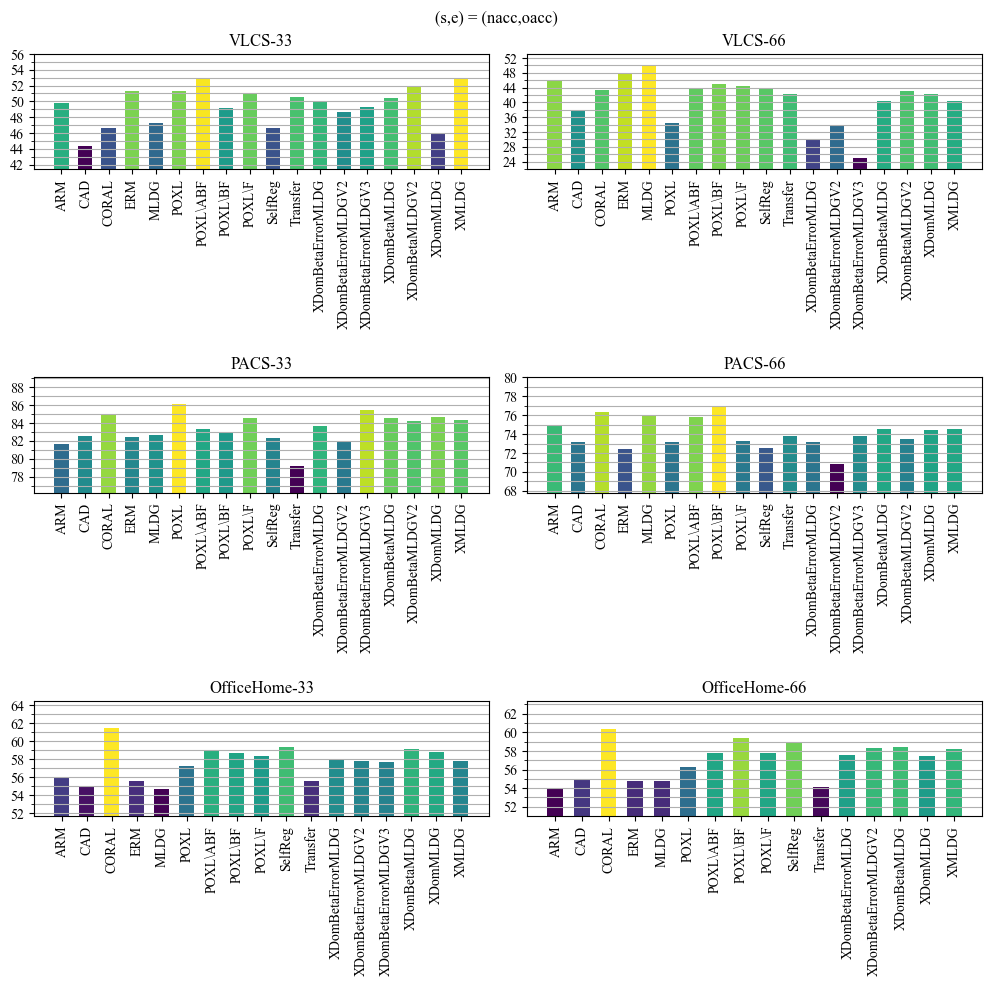

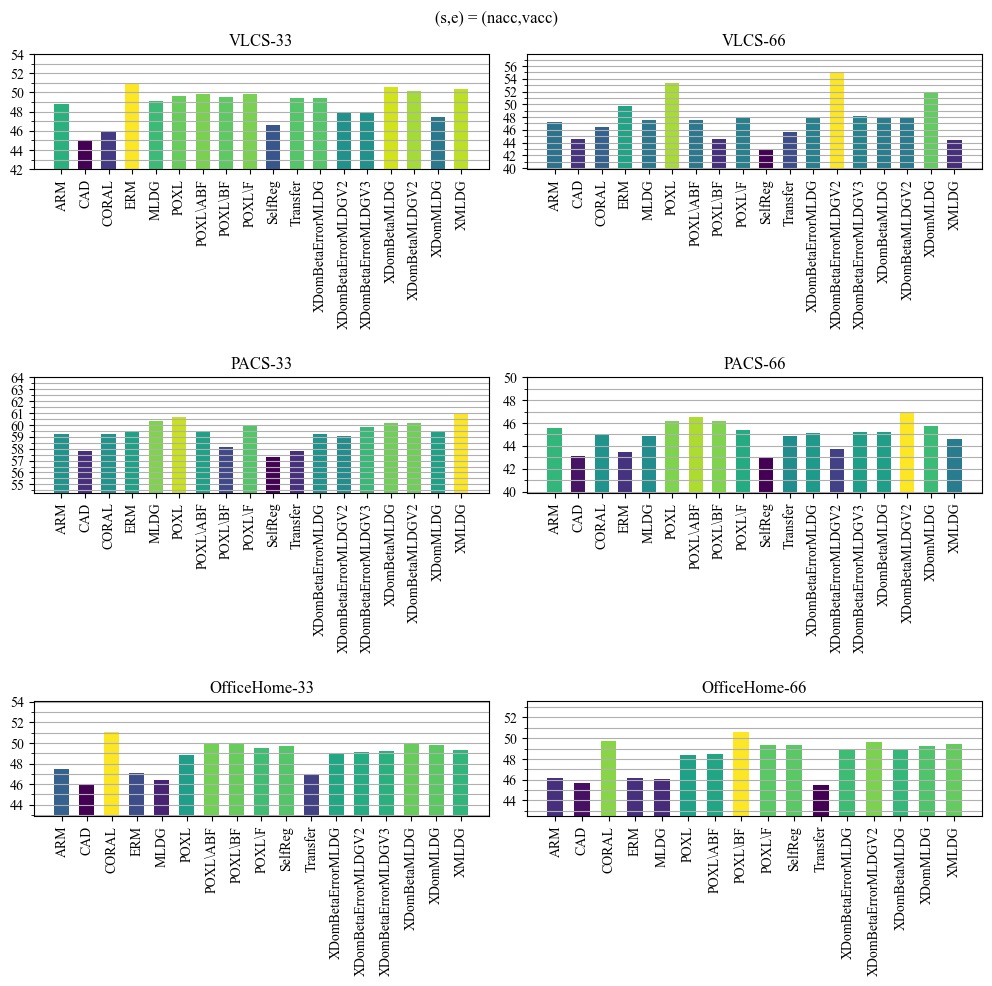

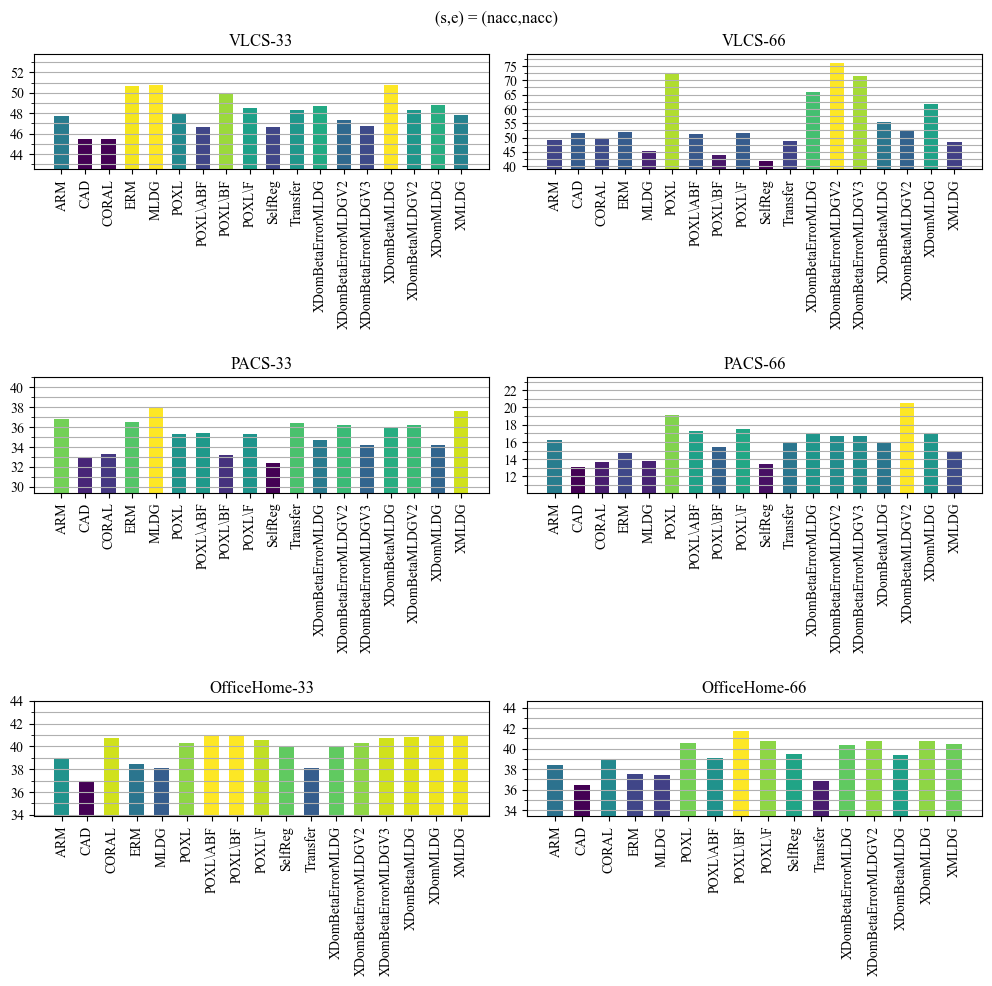

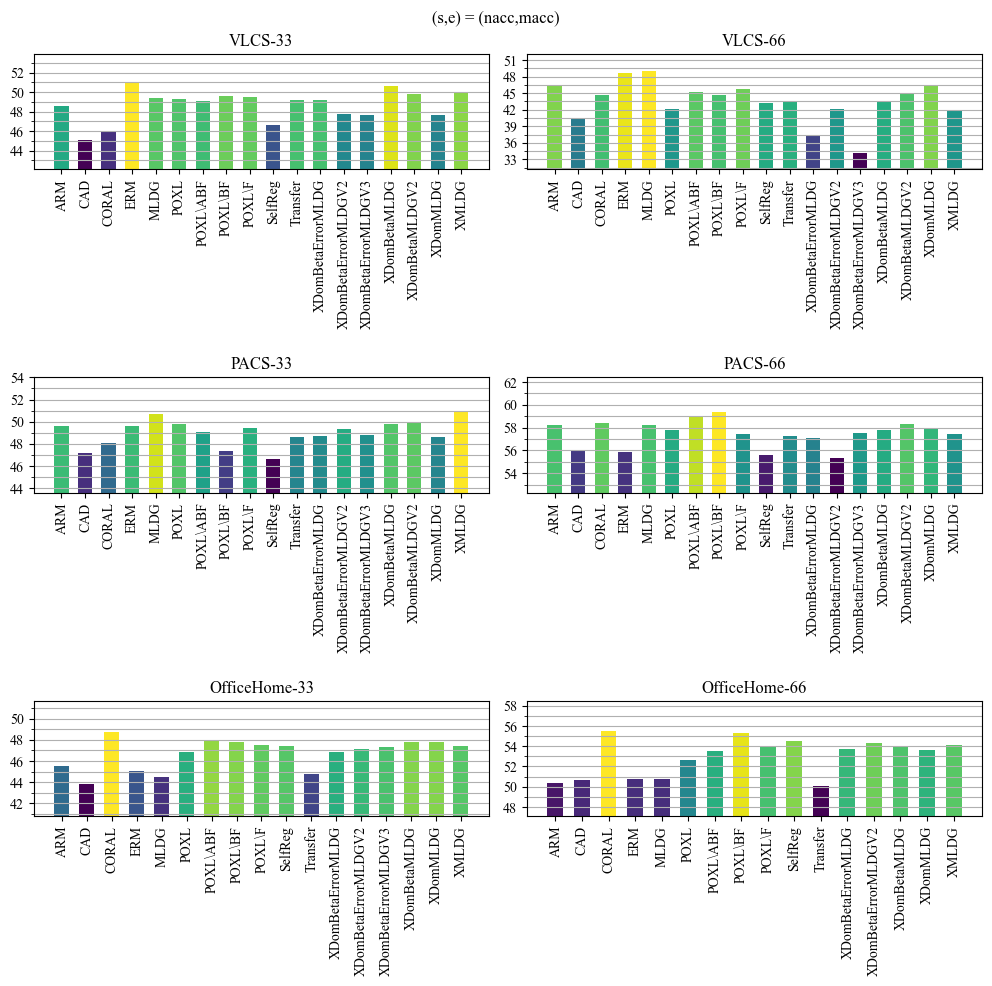

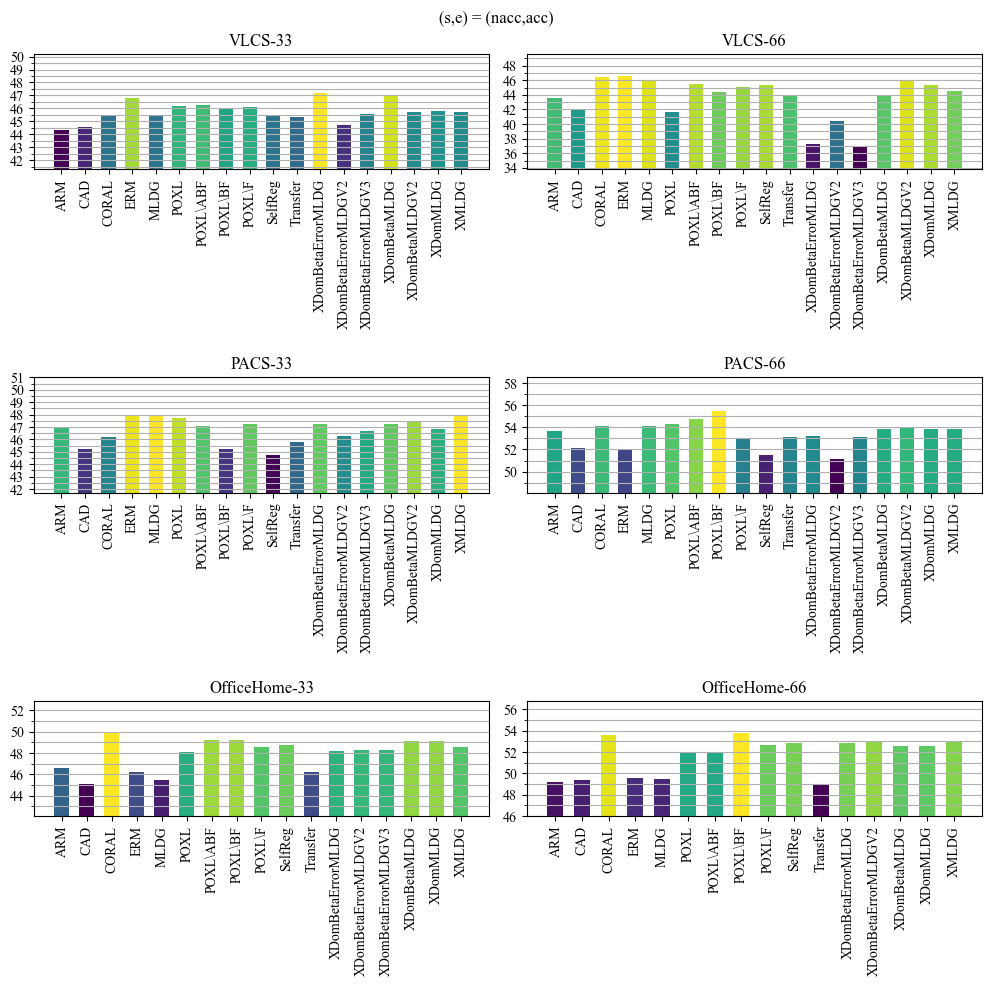

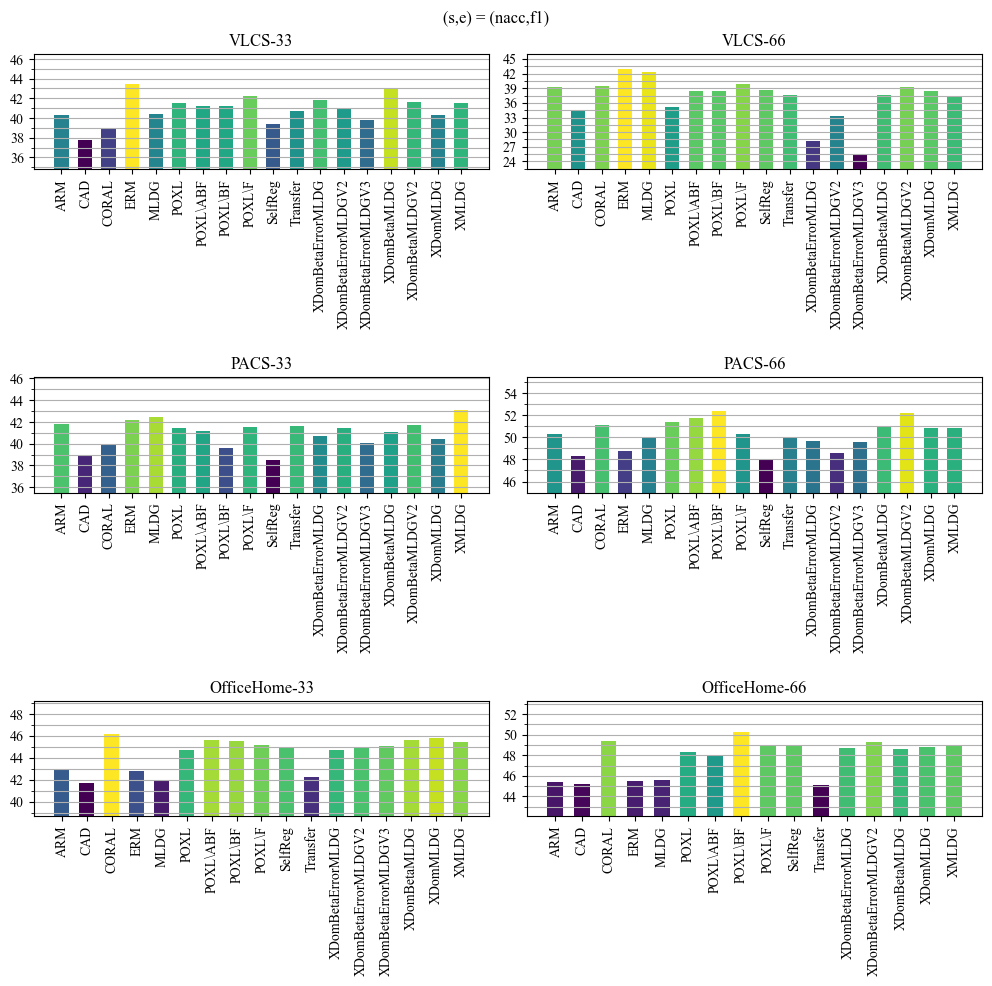

In [14]:
# remove non-baseline
data = df.loc[
    (df['algorithm'] != 'Intra') &
    (df['algorithm'] != 'SupCon') &
    (df['algorithm'] != 'Intra_XDom') &
    (df['algorithm'] != 'XDom') &
    (df['algorithm'] != 'XDomError') &
    (df['algorithm'] != 'XDomBatch') 
]

overlap_list = ['33', '66']
dataset_list = list(df["dataset"].unique())
# dataset_list = ['VLCS']
sl = list(data["selection_metric"].unique())
el = list(data["evaluation_metric"].unique())
sl_el = itertools.product(sl, el)
for s, e in sl_el:
    #if e != s: continue
    if s != 'nacc': continue
    #if e not in  ['nacc', 'vacc', 'macc']: continue
    # if e != 'f1' or s != 'f1': continue
    plot_results(data, s, e, overlap_list, dataset_list)

## Plot the relationship between "nacc" and "oacc"
- Could average across: datasets, overlaps, selection_metrics
    - Across datasets would be the most beneficial and easiest to justify
- Purpose of this plot is display the relationship between non-overlapping and overlapping class accuracies for different methods
- With `selec_metric='nacc'` across all datasets (even excluding VLCS anomally) XDom best accuracy and XDomError best non-overlapping accuracy
- Set the ylim and xlim with the zoom in plot to show the performance discrepancy
- Show the accuracy color gradient in the plot
- Use a zoomed in subplot for the results

# Global Average

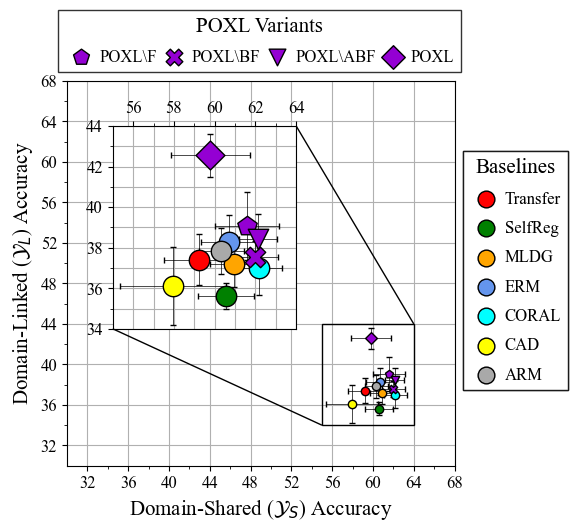

In [92]:
from results import plot_global_dataset, plot_overlap_dataset, AXIS_LABELS, METHOD_NAME
import math
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

dataset_list = list(df['dataset'].unique())
x='oacc'
y='nacc'
selec_metric='nacc'
num_major_ticks = 7
offset = 5

fig, ax = plt.subplots(figsize=(5,5))

data = plot_overlap_dataset(df=df, ax=ax, selec_metric=selec_metric, x=x, y=y, markersize=2)

# AXIS LABELS
# ax.set_title(f"{dataset}-{selec_metric}")
# ax.set_title(f"")
# ax.grid(axis="both", which="both")
# SET EQUAL AXIS RANGE/VALUES
x_min = math.floor(min(data[x])) - offset
x_max = math.ceil(max(data[x])) + offset
y_min = math.floor(min(data[y])) - offset
y_max = math.ceil(max(data[y])) + offset

ax_min = y_min = x_min = min(y_min, x_min)
ax_max = y_max = x_max = max(y_max, x_max)
ax_steps = (ax_max - ax_min) / num_major_ticks

ax.set_xlim(ax_min, ax_max)
ax.set_ylim(ax_min, ax_max)

ax.set_xticks(np.arange(ax_min, ax_max, ax_steps))
ax.set_yticks(np.arange(ax_min, ax_max, ax_steps))

ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))

ax.get_yaxis().set_major_locator(MaxNLocator(integer=True))
ax.get_xaxis().set_major_locator(MaxNLocator(integer=True))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(axis="both", which="major")

# MIRROR LINE
# ax.plot([ax_min + offset, ax_max - offset], [ax_min + offset, ax_max - offset], "k--", linewidth=1)

# LABELS
ax.set_ylabel(AXIS_LABELS[y], fontsize=15)
ax.set_xlabel(AXIS_LABELS[x], fontsize=15)
# ax.set_title("$\mathcal{Y}_O$ versus $\mathcal{Y}_N$ Accuracy Discrepancy", fontsize=15)
# LEGEND
# legend = ax.legend(
#     #loc='center left', 
#     loc='upper center',
#     bbox_to_anchor=(0.5,-0.15),
#     ncols=4,
#     columnspacing=0.2,
#     #bbox_to_anchor=(1, 0.5), 
#     title="Algorithms", 
#     markerscale=1.5, 
#     fontsize=12,
#     title_fontsize=15,
#     fancybox=False,
#     edgecolor='black',
#     handletextpad=0.4
# )
#plt.setp(legend.get_title(),fontsize=15)

# ZOOM PLOT
axins = zoomed_inset_axes(
    ax, 2, loc='upper left', bbox_to_anchor=(0.1,0.9),
                   bbox_transform=ax.transAxes)

plot_overlap_dataset(df=df, ax=axins, selec_metric=selec_metric, x=x, y=y, markersize=3)
axins.set_xlim(55, 64)
axins.set_ylim(34, 44)
# axins.axes.get_xaxis().set_ticklabels([])
# axins.axes.get_yaxis().set_ticklabels([])
axins.grid(axis="both", which="both")


# AXIS LABELS
# ax.set_title(f"{dataset}-{selec_metric}")
# ax.set_title(f"")
# ax.grid(axis="both", which="both")
# # SET EQUAL AXIS RANGE/VALUES
# x_min = math.floor(min(data[x])) - offset
# x_max = math.ceil(max(data[x])) + offset
# y_min = math.floor(min(data[y])) - offset
# y_max = math.ceil(max(data[y])) + offset

# ax_min = y_min = x_min = min(y_min, x_min)
# ax_max = y_max = x_max = max(y_max, x_max)
# ax_steps = (ax_max - ax_min) / num_major_ticks

# axins.set_xticks(np.arange(ax_min, ax_max, ax_steps))
# axins.set_yticks(np.arange(ax_min, ax_max, ax_steps))

axins.yaxis.set_minor_locator(AutoMinorLocator(2))
axins.xaxis.set_minor_locator(AutoMinorLocator(2))

axins.get_yaxis().set_major_locator(MaxNLocator(integer=True, nbins=5))
axins.get_xaxis().set_major_locator(MaxNLocator(integer=True, nbins=5))

axins.xaxis.set_tick_params(labeltop=True)
axins.xaxis.set_tick_params(labelbottom=False)
axins.xaxis.tick_top()
axins.tick_params(axis='both', which='major', labelsize=12)

mark_inset(ax, axins, loc1=1, loc2=3, lw=1, fc="none", ec="black", zorder=10)

# LEGEND
# LEGEND
handles, labels = ax.get_legend_handles_labels()
legend_offset = 0.03
# get baselines
baselines = ([], [])
ablations = ([], [])
for handle, label in zip(handles, labels):
    if label in BASELINES:
        baselines[0].append(handle)
        baselines[1].append(label)
    else:
        ablations[0].append(handle)
        ablations[1].append(label)

# Create a baseline class legend
# baseline_legend = fig.legend(
#     title="Baselines",
#     handles=baselines[0], 
#     labels=baselines[1], 
#     #markerscale=5,
#     loc='lower left', 
#     #ncols=len(noc_legend[0]),
#     bbox_to_anchor=(1,0.5),
#     #columnspacing=0.2,
#     title_fontsize=15,
#     #bbox_to_anchor=(1,0.65),
#     )
baseline_legend = fig.legend(
    title="Baselines",
    handles=baselines[0], 
    labels=baselines[1], 
    markerscale=2,
    #markerscale=5,
    #loc='lower center', 
    #ncols=len(baselines[0]),
#     ncols=len(baselines[0])//2,
#     bbox_to_anchor=(0.515, 0.88),
    loc='center left', 
    bbox_to_anchor=(0.9,0.5), 
    #columnspacing=0.2,
    handletextpad=0.1,
    labelspacing=0.8,
    fontsize=12,
    title_fontsize=15,
    fancybox=False,
    edgecolor='black',
    #bbox_to_anchor=(1,0.65),
    )
# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(baseline_legend)

# Create the ablation class legend

# legend = fig.legend(
#     title="Ablations",
#     handles=ablations[0], 
#     labels=ablations[1], 
#     #ncols=8, 
#     loc='upper left', 
#     bbox_to_anchor=(1, 0.5), 
#     #fontsize=12, 
#     #columnspacing=0.2,
#     title_fontsize=15,
# )
legend = fig.legend(
    title=METHOD_NAME+" Variants",
    handles=ablations[0], 
    labels=ablations[1], 
    markerscale=2,
    #ncols=len(ablations[0])//2, 
#     loc='center left', 
#     bbox_to_anchor=(0.9,0.5),
    loc='lower center',
    ncols=len(ablations[0]),
    bbox_to_anchor=(0.51, 0.88),
    fontsize=12, 
    columnspacing=0,
    handletextpad=0.1,
    labelspacing=0.8,
    title_fontsize=15,
    fancybox=False,
    edgecolor='black',
)
# legend = axes[0,0].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Algorithms", fontsize=12)
# plt.setp(legend.get_title(),fontsize=15)
# Save figure
fig.savefig(os.path.join(FILE_SAVE, 'total_plot_fig.pdf'), bbox_inches='tight', format='pdf')

## Create a scatter plot for each dataset for each overlap
- Also visualizes the effect of different selection metrics
- Our method makes better use of more intra-domain relationships

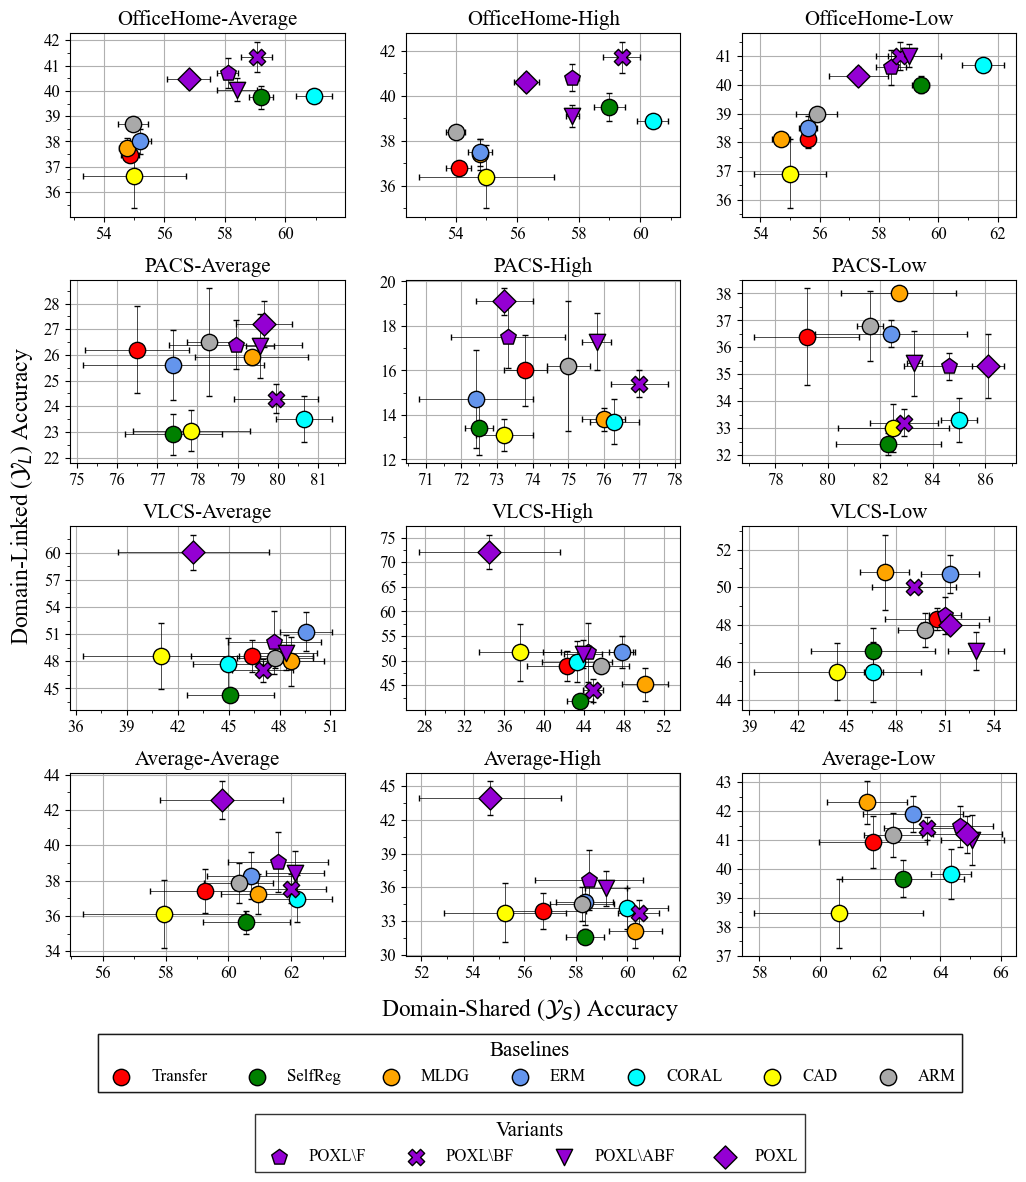

In [91]:
from results import plot_overlap_dataset, AXIS_LABELS, BASELINES

dataset_list = list(df['dataset'].unique())
x='oacc'
y='nacc'
color_metric='acc'
selec_metric='nacc'

dataset_list = ['OfficeHome', 'PACS', 'VLCS', ['OfficeHome', 'VLCS', 'PACS']]
dataset_label = ['OfficeHome', 'PACS', 'VLCS', 'Average']
op_list = ['33', '66', ['33', '66']][::-1]
title_list = ['Low', 'High', 'Average'][::-1]

fig, axes = plt.subplots(
    nrows=len(dataset_list), 
    ncols=len(op_list), 
    figsize=(10,10), 
    #sharey='row', 
    # sharex='col',
)
for i, (overlap, op_type) in enumerate(zip(op_list, title_list)):
    for j, dataset in enumerate(dataset_list):
        ax = axes[j,i]
        data = plot_overlap_dataset(
            df=df, 
            dataset=dataset, 
            ax=ax, 
            selec_metric=selec_metric,
            x=x,
            y=y,
            color_metric=color_metric,
            overlap=overlap)
        ax.set_title(f"{dataset_label[j]}-{op_type}", fontsize=15)
        # AXIS LABELS
        # ax.set_title(f"{dataset}")
        ax.grid(axis="both", which="major")

        ax.yaxis.set_minor_locator(AutoMinorLocator(2))
        ax.xaxis.set_minor_locator(AutoMinorLocator(2))

        ax.get_yaxis().set_major_locator(MaxNLocator(integer=True, nbins=8))
        ax.get_xaxis().set_major_locator(MaxNLocator(integer=True, nbins=8))
        
        # We change the fontsize of major ticks label 
        ax.tick_params(axis='both', which='major', labelsize=12)
        
#         # set average face color plot
#         if not (i != 0 and j != len(dataset_list)-1):
#             ax.set_facecolor('gainsboro')
            
#         if i == 0 and j == len(dataset_list) -1:
#             ax.set_facecolor('grey')

# AXIS LABELS
fig.text(0.5, -0.02, AXIS_LABELS[x], ha='center', fontsize=17)
fig.text(-0.02, 0.5, AXIS_LABELS[y], va='center', rotation='vertical', fontsize=17)
# https://stackoverflow.com/questions/16150819/common-xlabel-ylabel-for-matplotlib-subplots
# axes[1][0].set_ylabel(AXIS_LABELS[y], fontsize=20)
# axes[len(op_list)-1][1].set_xlabel(AXIS_LABELS[x], fontsize=20)
# plt.ylabel(AXIS_LABELS[y], fontsize=20)
# plt.xlabel(AXIS_LABELS[x], fontsize=20)

# LEGEND
handles, labels = axes[0,0].get_legend_handles_labels()
legend_offset = 0.03
# get baselines
baselines = ([], [])
ablations = ([], [])
for handle, label in zip(handles, labels):
    if label in BASELINES:
        baselines[0].append(handle)
        baselines[1].append(label)
    else:
        ablations[0].append(handle)
        ablations[1].append(label)

# Create a baseline class legend
# baseline_legend = fig.legend(
#     title="Baselines",
#     handles=baselines[0], 
#     labels=baselines[1], 
#     #markerscale=5,
#     loc='lower left', 
#     #ncols=len(noc_legend[0]),
#     bbox_to_anchor=(1,0.5),
#     #columnspacing=0.2,
#     title_fontsize=15,
#     #bbox_to_anchor=(1,0.65),
#     )
baseline_legend = fig.legend(
    title="Baselines",
    handles=baselines[0], 
    labels=baselines[1], 
    #markerscale=5,
    loc='upper center', 
    ncols=len(baselines[0]),
    bbox_to_anchor=(0.5, -(0+legend_offset)),
    #columnspacing=0.2,
    fontsize=12,
    title_fontsize=15,
    fancybox=False,
    edgecolor='black',
    #bbox_to_anchor=(1,0.65),
    )
# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(baseline_legend)

# Create the ablation class legend

# legend = fig.legend(
#     title="Ablations",
#     handles=ablations[0], 
#     labels=ablations[1], 
#     #ncols=8, 
#     loc='upper left', 
#     bbox_to_anchor=(1, 0.5), 
#     #fontsize=12, 
#     #columnspacing=0.2,
#     title_fontsize=15,
# )
legend = fig.legend(
    title="Variants",
    handles=ablations[0], 
    labels=ablations[1], 
    ncols=len(ablations[0]), 
    loc='upper center', 
    bbox_to_anchor=(0.5, -(0.08+legend_offset)), 
    fontsize=12, 
    #columnspacing=0.2,
    title_fontsize=15,
    fancybox=False,
    edgecolor='black',
)
# legend = axes[0,0].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Algorithms", fontsize=12)
# plt.setp(legend.get_title(),fontsize=15)

fig.tight_layout(pad=1.0, h_pad=1.0, w_pad=2.0)
fig.savefig(os.path.join(FILE_SAVE, 'noc_oc.pdf'), bbox_inches='tight', format='pdf')

# JUPYTER GOAL
    # Save each one of these subplots as its own separate figure as a pdf
        # fig.savefig(os.path.join(FILE_SAVE, 'total_plot_fig.pdf'), bbox_inches='tight', format='pdf')
        # keep the ticks don't plot the axis labels
        # don't plot the subplot titles 
            # these should be figure captions instead e.g. (a) OfficeHome-Average
                # I suggest make the image save name == title e.g. officehome-average.pdf
        # INTERFACE: dataset and overlap
        # SUCCESS == same plot in paper but just individual figures
# LATEX GOAL
    # Create this figure grid in latex (refer to the dataset visualization figure)
    # caption at the bottom of each subfigure which will be the title
    # LEGEND: use the large original image and crop in latex

## Legend

In [44]:
dataset = ['VLCS']
overlap = ['66']